# Packages

In [1]:
using Distributions, Gadfly, DataFrames, CSV, GLM, Extremes

In [2]:
import Pkg
Pkg.add(url = "https://github.com/JuliaExtremes/IDFCurves.jl", rev="dev")

    Updating git-repo `https://github.com/JuliaExtremes/IDFCurves.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/Desktop/projet de recherche/julia code - réorganisation/IDFCurves package/IDFCurves.jl/docs/Project.toml`
  [17afcda4] ~ IDFCurves v0.2.0 `https://github.com/JuliaExtremes/IDFCurves.jl#163-conversion-of-the-hessian-into-a-pdmat-object-may-cause-an-error` ⇒ v0.2.0 `https://github.com/JuliaExtremes/IDFCurves.jl#dev`
    Updating `~/Desktop/projet de recherche/julia code - réorganisation/IDFCurves package/IDFCurves.jl/docs/Manifest.toml`
  [17afcda4] ~ IDFCurves v0.2.0 `https://github.com/JuliaExtremes/IDFCurves.jl#163-conversion-of-the-hessian-into-a-pdmat-object-may-cause-an-error` ⇒ v0.2.0 `https://github.com/JuliaExtremes/IDFCurves.jl#dev`
Precompiling project...
  ✓ IDFCurves
  1 dependency successfully precompiled in 3 seconds. 190 already precompiled.


In [3]:
using IDFCurves

In [4]:
include("functions_realdata.jl");

# Data

## Montréal

In [5]:
# raw data (from ECCC website)
df = CSV.read(joinpath("data", "702S006.csv"), DataFrame);

In [6]:
# durations
durations = [1/12, 1/6, 1/4, 1/2, 1, 2, 6, 12, 24]
tags = names(df)[2:10]
duration_dict = Dict(zip(tags, durations));

In [7]:
# preprocessing
pp_df = preprocess(df, tags, duration_dict);

In [8]:
# IDFdata object
data_YUL = IDFdata(pp_df, "Year", duration_dict);

## Vancouver

In [9]:
# raw data (from ECCC website)
df = CSV.read(joinpath("data", "1108446.csv"), DataFrame);

In [10]:
# durations
durations = [1/12, 1/6, 1/4, 1/2, 1, 2, 6, 12, 24]
tags = names(df)[2:10]
duration_dict = Dict(zip(tags, durations));

In [11]:
# preprocessing
pp_df = preprocess(df, tags, duration_dict);

In [12]:
# IDFdata object
data_CXH = IDFdata(pp_df, "Year", duration_dict);

# IDF curves

In [13]:
set_default_plot_size(18cm, 12cm)

## Montréal

### 1) No scaling

Return levels are obtained for each duration independently by fitting a GEV distribution. Interpolation at intermediate durations is done by regression for each return period separately.

As this is not a feature of the IDFCurves library, the `plotIDFCurves_regression(data::IDFdata)` method is implemented in the _functions_realdata.jl_ file.

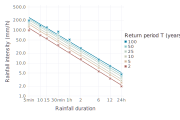

In [14]:
plotIDFCurves_regression(data_YUL)

### 2) Simple Scaling

The simple scaling model is fitted to the data and the IDF curves are plotted. On the figure, the crosses correspond to the pointwise estimated return levels (as in the figure above), and are represented for illustration purposes only.

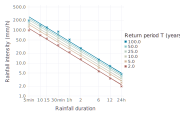

In [15]:
fitted_SS_YUL = IDFCurves.fit_mle(SimpleScaling, data_YUL, 1)
plotIDFCurves(fitted_SS_YUL, data_YUL, y_ticks = [log(1),log(2),log(5),log(10),log(20),log(50),log(100),log(200), log(500)])

### 3) General Scaling

The general scaling model is fitted to the data and the IDF curves are plotted. On the figure, the crosses correspond to the pointwise estimated return levels and are represented for illustration purposes only.

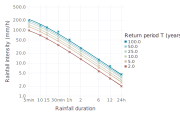

In [16]:
fitted_GS_YUL = IDFCurves.fit_mle(GeneralScaling, data_YUL, 1)
plotIDFCurves(fitted_GS_YUL, data_YUL, y_ticks = [log(1),log(2),log(5),log(10),log(20),log(50),log(100),log(200), log(500)])

## Vancouver

### 1) No scaling

Return levels are obtained for each duration independently by fitting a GEV distribution. Interpolation at intermediate durations is done by regression for each return period separately.

As this is not a feature of the IDFCurves library, the `plotIDFCurves_regression(data::IDFdata)` method is implemented in the _functions_realdata.jl_ file.

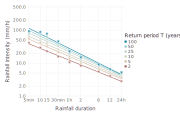

In [17]:
plotIDFCurves_regression(data_CXH)

### 2) Simple Scaling

The simple scaling model is fitted to the data and the IDF curves are plotted. On the figure, the crosses correspond to the pointwise estimated return levels (as in the figure above), and are represented for illustration purposes only.

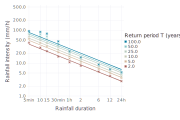

In [18]:
fitted_SS_CXH = IDFCurves.fit_mle(SimpleScaling, data_CXH, 1)
plotIDFCurves(fitted_SS_CXH, data_CXH, y_ticks = [log(1),log(2),log(5),log(10),log(20),log(50),log(100),log(200), log(500)])

### 3) General Scaling

The general scaling model is fitted to the data and the IDF curves are plotted. On the figure, the crosses correspond to the pointwise estimated return levels and are represented for illustration purposes only.

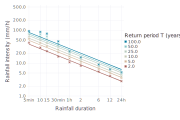

In [19]:
fitted_GS_CXH = IDFCurves.fit_mle(GeneralScaling, data_CXH, 1)
plotIDFCurves(fitted_GS_CXH, data_CXH, y_ticks = [log(1),log(2),log(5),log(10),log(20),log(50),log(100),log(200), log(500)])

# Test on scaling models

## Montréal

### 1) Simple Scaling

We test the simple scaling model over the data available at Montréal-Trudeau airport. The chosen duration for validation is the smallest duration i.e. 5min. We start with a visual comparison of the empirical and estimated cdfs for the 5min data then the p-value is computed using IDFCurves.jl.

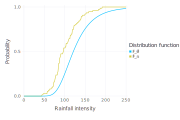

In [20]:
plotCDFscomparison(SimpleScaling, data_YUL, "5 min")

In [21]:
pval = scalingtest(SimpleScaling, data_YUL, "5 min")

1.442116402183835e-6

The simple scaling model is rejected.

### 2) General Scaling

We test the general scaling model over the data available at Montréal-Trudeau airport. The chosen duration for validation is the smallest duration i.e. 5min. We start with a visual comparison of the empirical and estimated cdfs for the 5min data then the p-value is computed using IDFCurves.jl.

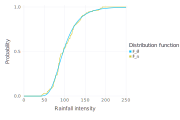

In [22]:
plotCDFscomparison(GeneralScaling, data_YUL, "5 min")

In [23]:
pval = scalingtest(GeneralScaling, data_YUL, "5 min")

1.0

The exact p-value is irrelevant as the approximation used to compute it is valid only for high-order quantiles (hence small p-values). Yet the conclusion that can be made is that it is bigger than 0.05. So the general scaling model is not rejected.

## Vancouver

### 1) Simple Scaling

We test the simple scaling model over the data available at Vancouver Harbour aerodrome. The chosen duration for validation is the smallest duration i.e. 5min. We start with a visual comparison of the empirical and estimated cdfs for the 5min data then the p-value is computed using IDFCurves.jl.

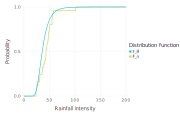

In [24]:
plotCDFscomparison(SimpleScaling, data_CXH, "5 min")

In [25]:
pval = scalingtest(SimpleScaling, data_CXH, "5 min")

0.045204048408580055

The simple scaling model is not rejected.